In [2]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [8]:
data_earthquakes = pd.read_csv('Japan earthquakes 2001 - 2018.csv', delimiter=',')

In [9]:
np.unique(data_earthquakes["type"].values)

array(['earthquake', 'nuclear explosion'], dtype=object)

In [10]:
data_earthquakes.shape

(14092, 22)

In [11]:
data_earthquakes.head(5)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2018-11-27T14:34:20.900Z,48.3780,154.9620,35.00,4.9,mb,NaN,92.0,5.044,0.63,...,2018-11-27T16:06:33.040Z,"269km SSW of Severo-Kuril'sk, Russia",earthquake,7.6,1.7,0.036,248.0,reviewed,us,us
1,2018-11-26T23:33:50.630Z,36.0733,139.7830,48.82,4.8,mww,NaN,113.0,1.359,1.13,...,2018-11-27T16:44:22.223Z,"3km SSW of Sakai, Japan",earthquake,6.0,6.1,0.071,19.0,reviewed,us,us
2,2018-11-26T13:04:02.250Z,38.8576,141.8384,50.56,4.5,mb,NaN,145.0,1.286,0.84,...,2018-11-26T23:52:21.074Z,"26km SSE of Ofunato, Japan",earthquake,8.4,9.5,0.156,12.0,reviewed,us,us
3,2018-11-26T05:20:16.440Z,50.0727,156.1420,66.34,4.6,mb,NaN,128.0,3.191,0.62,...,2018-11-26T08:13:58.040Z,"67km S of Severo-Kuril'sk, Russia",earthquake,9.7,7.8,0.045,151.0,reviewed,us,us
4,2018-11-25T09:19:05.010Z,33.9500,134.4942,38.19,4.6,mb,NaN,104.0,0.558,0.61,...,2018-11-25T23:24:52.615Z,"9km SW of Komatsushima, Japan",earthquake,3.4,10.1,0.132,17.0,reviewed,us,us


In [37]:
data_earthquakes["time_int"] = data_earthquakes["time"].map(lambda s: datetime.datetime.strptime(s[:19], "%Y-%m-%dT%H:%M:%S").timestamp())

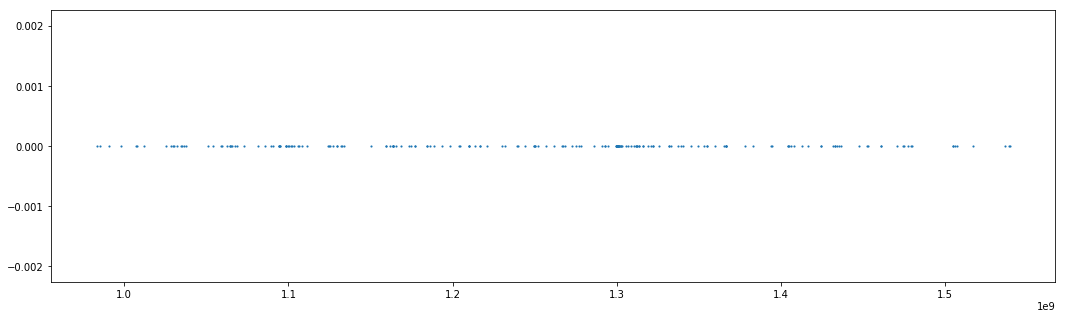

In [38]:
fig, ax = plt.subplots(figsize=(18, 5))
plt.scatter(data_earthquakes[data_earthquakes["mag"] > 6]["time_int"], [0] * data_earthquakes[data_earthquakes["mag"] > 6].shape[0], marker='.', s=5)
plt.show()

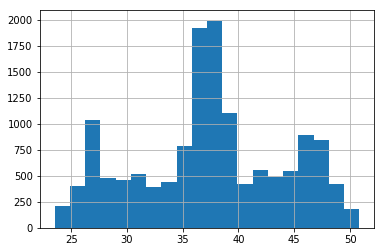

In [39]:
data_earthquakes["latitude"].hist(bins=20)

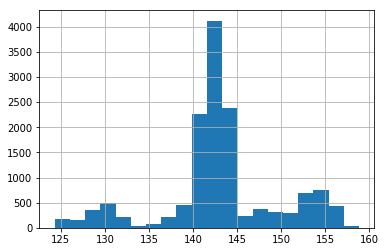

In [40]:
data_earthquakes["longitude"].hist(bins=20)

In [54]:
def plot_PP(t):
    fig, ax = plt.subplots(figsize=(18, 10))
    plt.step([t[0]] + t, [0] + list(range(len(t))))
    plt.scatter(t, [0] * len(t), color='r')
    for h, T in enumerate(t):
        plt.plot([T, T], [0, h], '--', color="darkred")
    plt.xticks(np.linspace(978578301, 1.543326e+09, num=10), list(range(2001, 2020, 2)), fontsize=22)
    plt.yticks(fontsize=22)
    ax.set_xlabel("Year", fontsize=30)
    ax.set_ylabel("Number of earthquakes", fontsize=30)
    plt.show()

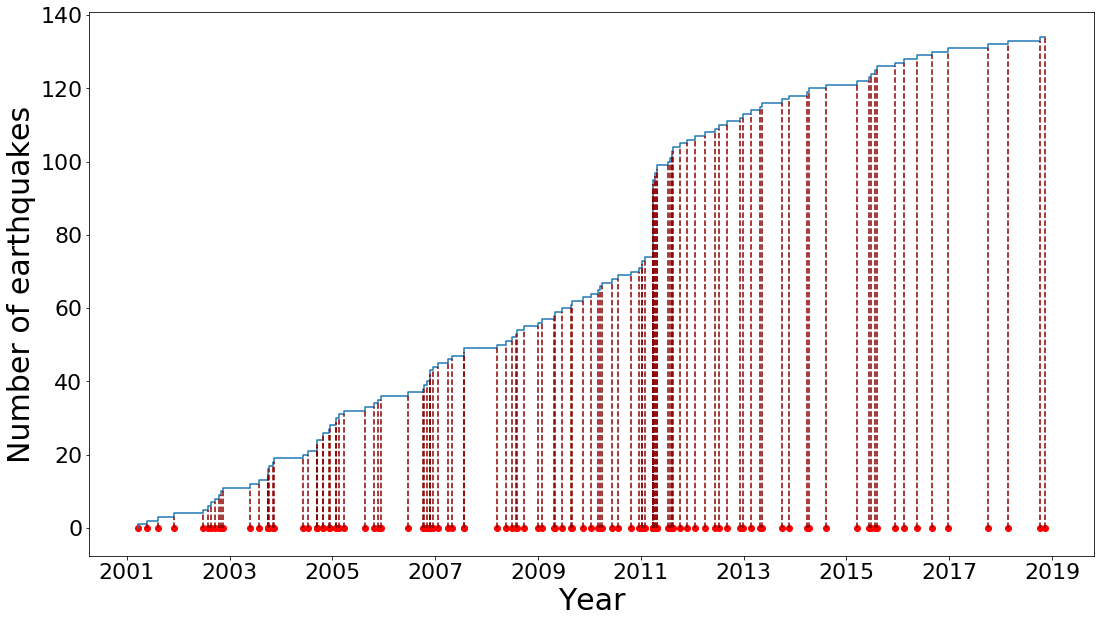

In [55]:
plot_PP(list(data_earthquakes[data_earthquakes["mag"] > 6.25]["time_int"].values)[::-1])

In [43]:
list(data_earthquakes[data_earthquakes["mag"] > 6]["time_int"].values)[::-1]

[983163502.0,
 985411673.0,
 990744050.0,
 997726283.0,
 1007294513.0,
 1007839774.0,
 1012222228.0,
 1025277570.0,
 1028322699.0,
 1029833972.0,
 1030207253.0,
 1032071972.0,
 1034597563.0,
 1035022145.0,
 1036291062.0,
 1037505233.0,
 1051174581.0,
 1053933873.0,
 1059164009.0,
 1059279931.0,
 1062364080.0,
 1064512206.0,
 1064516880.0,
 1064795813.0,
 1065596815.0,
 1067558788.0,
 1068622003.0,
 1072657854.0,
 1081699572.0,
 1085856969.0,
 1089275449.0,
 1090482314.0,
 1094371627.0,
 1094389038.0,
 1094506175.0,
 1094648305.0,
 1095037212.0,
 1098514560.0,
 1098514992.0,
 1098516844.0,
 1099789346.0,
 1100163767.0,
 1101663134.0,
 1102338911.0,
 1103348779.0,
 1106053746.0,
 1106111496.0,
 1107971169.0,
 1111280021.0,
 1124153188.0,
 1124871328.0,
 1125418245.0,
 1127262308.0,
 1129363577.0,
 1129715082.0,
 1132000731.0,
 1132583790.0,
 1133525589.0,
 1150048886.0,
 1159631423.0,
 1159686362.0,
 1161631039.0,
 1163585653.0,
 1163586562.0,
 1163586898.0,
 1163587255.0,
 1163782992.0,

In [172]:
data_strong = data_earthquakes[data_earthquakes["mag"] >= 6.2]

In [173]:
data_strong

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,time_int
101,2018-10-10T23:16:02.130Z,49.2902,156.2968,20.00,6.5,mww,NaN,14.0,3.923,0.64,...,"154km S of Severo-Kuril'sk, Russia",earthquake,7.4,1.8,0.053,34.0,reviewed,us,us,1.539206e+09
220,2018-09-05T18:07:59.150Z,42.6861,141.9294,35.00,6.6,mww,NaN,32.0,1.130,0.74,...,"27km ENE of Tomakomai, Japan",earthquake,6.5,1.9,0.062,25.0,reviewed,us,us,1.536164e+09
525,2018-01-24T10:51:19.090Z,41.1034,142.4323,31.00,6.3,mww,NaN,51.0,1.061,0.88,...,"101km ENE of Misawa, Japan",earthquake,6.3,1.8,0.060,27.0,reviewed,us,us,1.516787e+09
721,2017-10-06T07:59:32.880Z,37.5033,144.0201,9.00,6.2,mww,NaN,32.0,2.588,0.88,...,"259km ESE of Ishinomaki, Japan",earthquake,4.5,1.7,0.053,34.0,reviewed,us,us,1.507270e+09
769,2017-09-03T03:30:01.760Z,41.3324,129.0297,0.00,6.3,mb,NaN,10.0,3.309,0.83,...,"21km ENE of Sungjibaegam, North Korea",nuclear explosion,1.4,1.7,0.020,941.0,reviewed,us,us,1.504402e+09
1210,2016-11-21T20:59:49.270Z,37.3931,141.3870,9.00,6.9,mww,NaN,10.0,0.671,0.77,...,"35km ESE of Namie, Japan",earthquake,5.2,1.7,NaN,NaN,reviewed,us,us,1.479758e+09
1269,2016-10-21T05:07:22.990Z,35.3743,133.8092,5.63,6.2,mww,NaN,23.0,0.680,0.75,...,"6km S of Kurayoshi, Japan",earthquake,4.3,3.3,NaN,NaN,reviewed,us,us,1.477019e+09
1342,2016-09-23T00:14:34.700Z,34.4619,141.6368,10.00,6.2,mww,NaN,17.0,1.376,0.83,...,"143km ESE of Katsuura, Japan",earthquake,6.0,1.7,NaN,NaN,reviewed,us,us,1.474582e+09
1460,2016-08-04T16:24:33.530Z,24.9447,142.0141,510.00,6.3,mww,NaN,13.0,2.147,0.77,...,"71km ENE of Iwo Jima, Japan",earthquake,8.0,1.9,NaN,NaN,reviewed,us,us,1.470321e+09
1699,2016-04-15T16:25:06.220Z,32.7906,130.7543,10.00,7.0,mww,NaN,32.0,0.349,0.85,...,"1km E of Kumamoto-shi, Japan",earthquake,4.9,1.7,NaN,NaN,reviewed,us,us,1.460730e+09


In [179]:
lat_med = np.median(data_strong["latitude"]) - 0
lat_med

37.945499999999996

In [180]:
long_med = np.median(data_strong["longitude"]) - 0
long_med

142.03535

In [183]:
data_SO = data_strong[(data_strong["latitude"] < lat_med) & (data_strong["longitude"] < long_med)]
data_SE = data_strong[(data_strong["latitude"] < lat_med) & (data_strong["longitude"] >= long_med)]
data_NO = data_strong[(data_strong["latitude"] >= lat_med) & (data_strong["longitude"] < long_med)]
data_NE = data_strong[(data_strong["latitude"] >= lat_med) & (data_strong["longitude"] >= long_med)]

In [184]:
data_SO.shape

(65, 23)

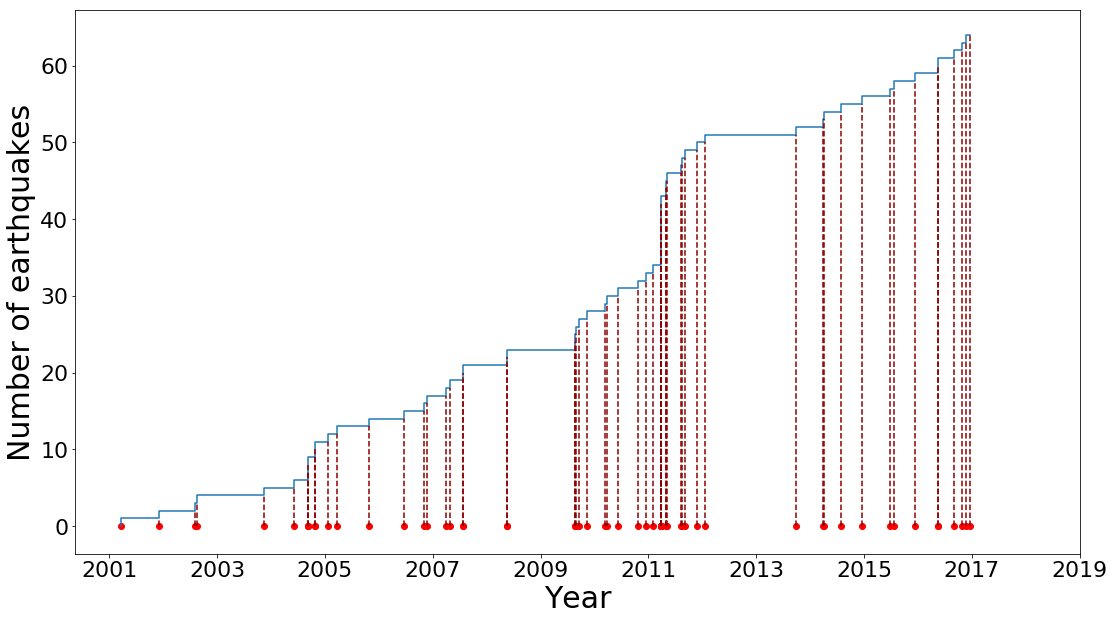

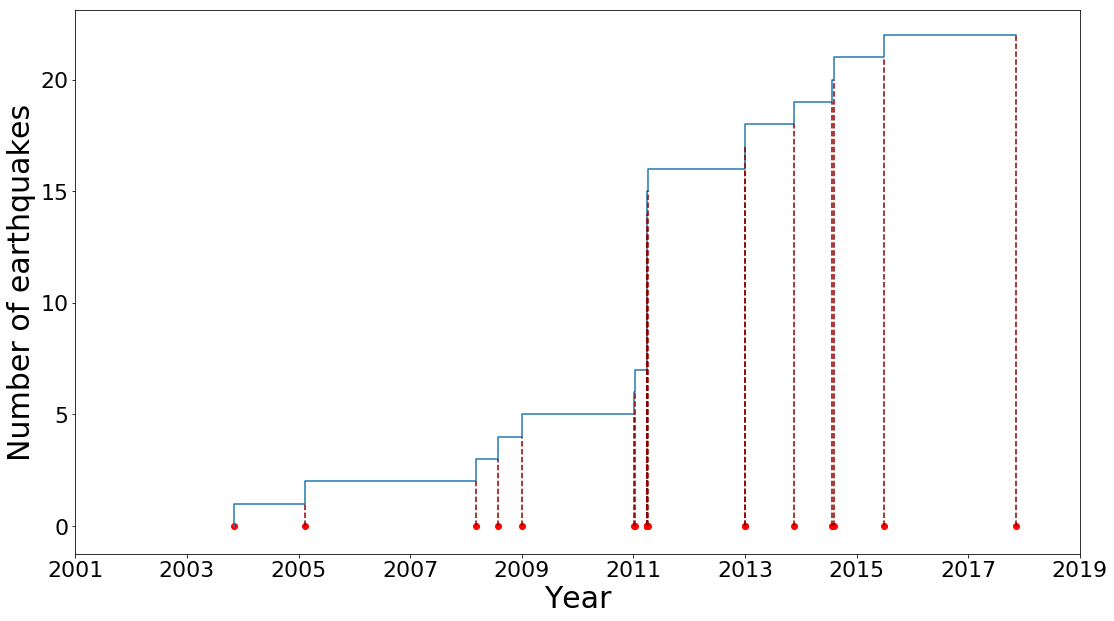

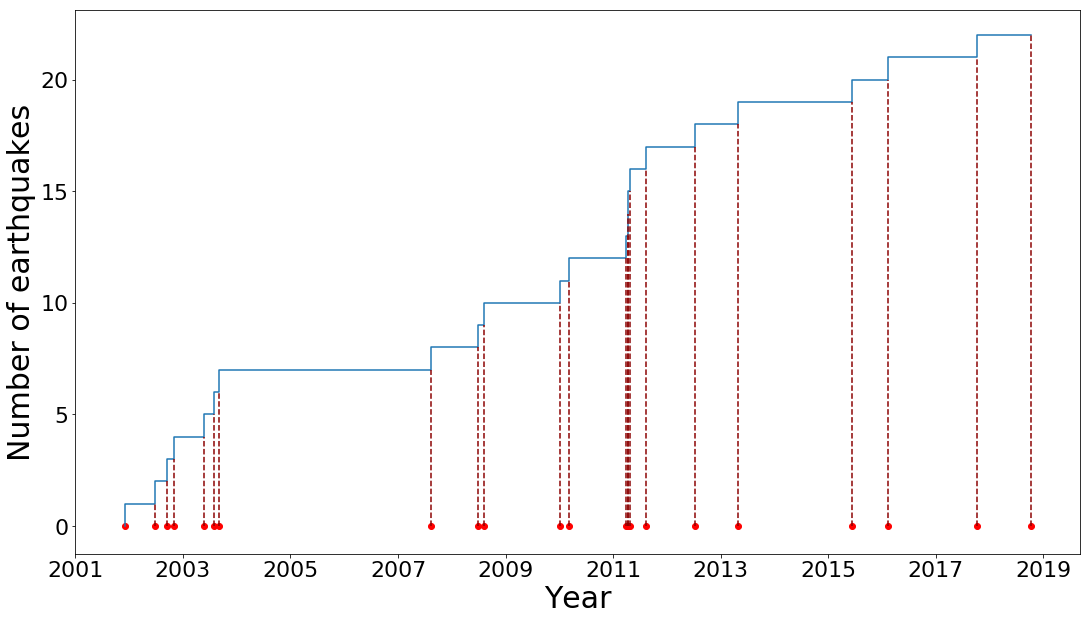

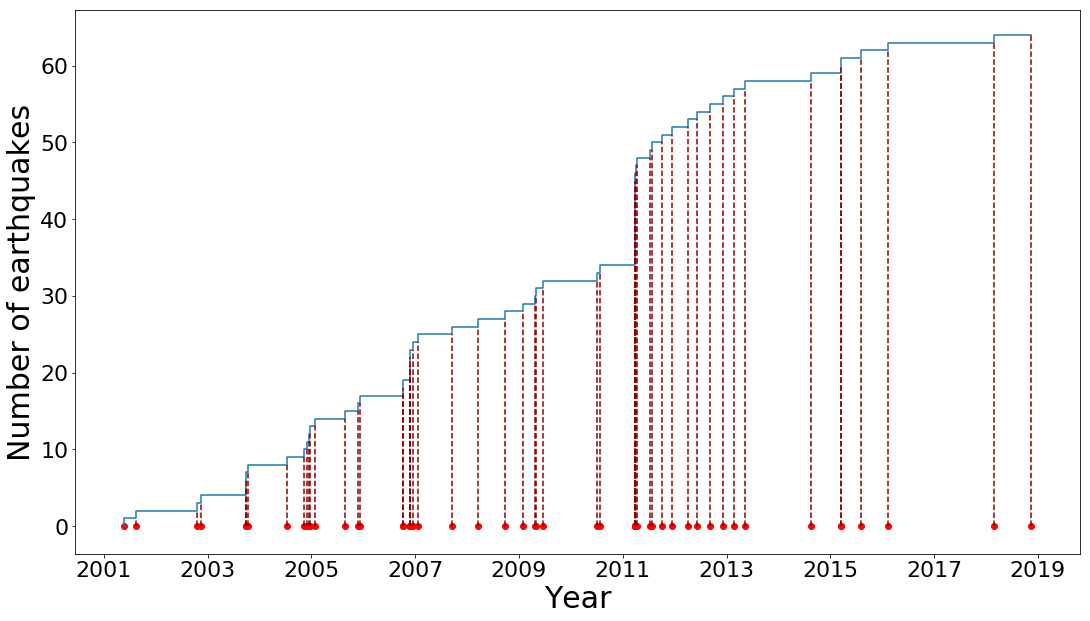

In [185]:
for df in [data_SO, data_SE, data_NO, data_NE]:
    plot_PP(list(df["time_int"].values)[::-1])

In [186]:
data_comp[data_comp["type"] != "earthquake"]

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
769,2017-09-03T03:30:01.760Z,41.3324,129.0297,0.0,6.3,mb,NaN,10.0,3.309,0.83,...,2017-12-07T20:00:05.040Z,"21km ENE of Sungjibaegam, North Korea",nuclear explosion,1.4,1.7,0.020,941.0,reviewed,us,us
1381,2016-09-09T00:30:01.440Z,41.2869,129.0783,0.0,5.3,mb,NaN,NaN,NaN,0.68,...,2016-12-07T02:56:06.040Z,"23km ENE of Sungjibaegam, North Korea",nuclear explosion,5.2,1.7,0.023,608.0,reviewed,spec,us
1848,2016-01-06T01:30:01.480Z,41.2996,129.0467,0.0,5.1,mb,NaN,21.0,3.340,0.83,...,2017-09-03T04:20:01.133Z,"21km ENE of Sungjibaegam, North Korea",nuclear explosion,6.0,1.7,0.032,306.0,reviewed,us,us
3903,2013-02-12T02:57:51.490Z,41.2990,129.0040,0.0,5.1,mb,426.0,39.1,NaN,0.82,...,2016-01-07T00:17:26.255Z,"24km ENE of Sungjibaegam, North Korea",nuclear explosion,NaN,NaN,NaN,296.0,reviewed,us,us
9744,2009-05-25T00:54:43.120Z,41.3030,129.0370,0.0,4.7,mb,131.0,41.2,NaN,0.65,...,2016-02-12T16:57:38.987Z,North Korea,nuclear explosion,NaN,NaN,NaN,53.0,reviewed,us,us


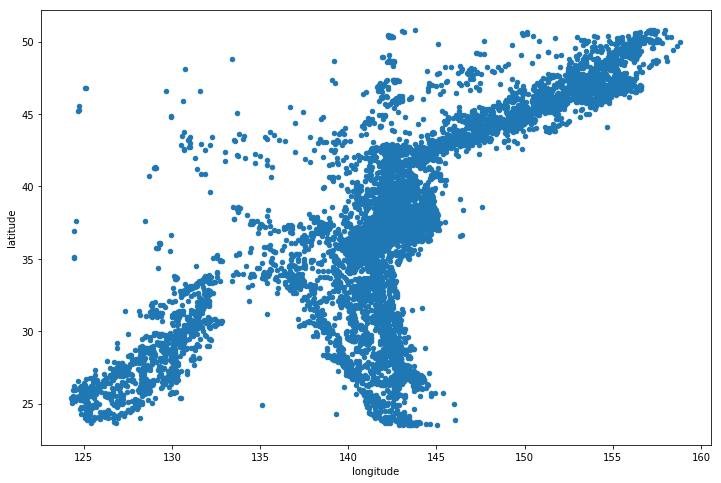

In [187]:
fig, ax = plt.subplots(figsize=(12, 8))
data_comp.plot.scatter(x = "longitude", y="latitude", ax=ax)
plt.show()

In [188]:
import pyreadr

result = pyreadr.read_r('./gadm36_JPN_0_sp.rds') # also works for RData

# done! 
# result is a dictionary where keys are the name of objects and the values python
# objects. In the case of Rds there is only one object with None as key
japan_frontier = result[None] # extract the pandas data frame 

LibrdataError: Unable to read from file

In [29]:
data_strong["date"] = data_strong["time_int"].map(datetime.datetime.fromtimestamp)

C:\Users\paul-\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [48]:
def plot_PP(t):
    fig, ax = plt.subplots(figsize=(18, 10))
    plt.step([t[0]] + t, [0] + list(range(len(t))))
    plt.scatter(t, [0] * len(t), color='r')
    for h, T in enumerate(t):
        plt.plot([T, T], [0, h], '--', color="darkred")
    plt.xticks(np.linspace(978578301, 1.543326e+09, num=10), list(range(2001, 2020, 2)), fontsize=22)
    plt.yticks(fontsize=22)
    ax.set_xlabel("Year", fontsize=30)
    ax.set_ylabel("Number of earthquakes", fontsize=30)
    plt.show()

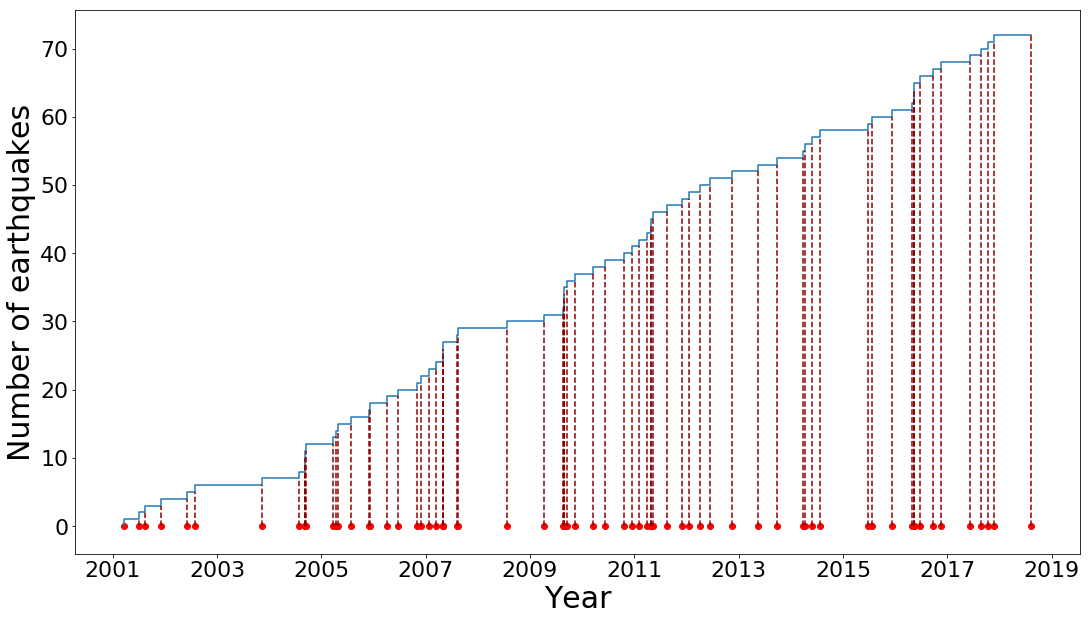

In [49]:
plot_PP(list(data_SO["time_int"].values)[::-1])